In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
alibi = pd.read_excel('fruit.xlsx')
alibi

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


mengecek karakter data

In [4]:
alibi.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


mengecek karakter data

In [5]:
alibi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


visualisai data

Text(0.5, 1.0, 'grafik')

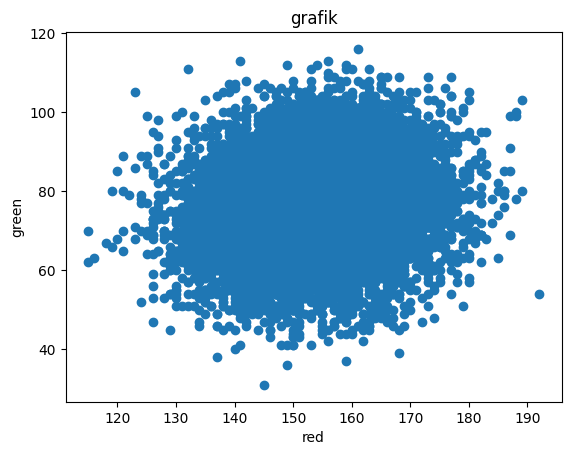

In [6]:
plt.scatter(alibi['red'],alibi['green'])
plt.xlabel("red")
plt.ylabel("green")
plt.title("grafik")

membuat data training dari data set red dan green

In [7]:
x_train = alibi[['red','green']].values

scailing perhitungn jarak agar sekala sama

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [9]:
x_train

array([[0.74025974, 0.63529412],
       [0.66233766, 0.55294118],
       [0.53246753, 0.58823529],
       ...,
       [0.68831169, 0.6       ],
       [0.35064935, 0.48235294],
       [0.48051948, 0.50588235]])

clustering

In [39]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [40]:
y_cluster = kmean.fit_predict(x_train)

In [41]:
y_cluster

array([2, 2, 1, ..., 2, 0, 0], dtype=int32)

In [42]:
alibi['Cluster'] = y_cluster

In [43]:
alibi

,diameter,weight,red,green,blue,name,Cluster
0,2.96,86.76,172,85,2,orange,2
1,3.91,88.05,166,78,3,orange,2
2,4.42,95.17,156,81,2,orange,1
3,4.47,95.60,163,81,4,orange,2
4,4.48,95.76,161,72,9,orange,2
...,...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit,0
9996,15.41,254.67,148,68,7,grapefruit,0
9997,15.59,256.50,168,82,20,grapefruit,2
9998,15.92,260.14,142,72,11,grapefruit,0


mengetahui centroid

In [44]:
kmean.cluster_centers_

array([[0.38087433, 0.45131761],
       [0.53110518, 0.67483562],
       [0.62152803, 0.46256632]])

visualisasi data hasil clustring  dengan centroid

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1392\3351151864.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1], cmap='rainbow',marker='*', s=140,label='Centroid 0')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1392\3351151864.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1], cmap='rainbow',marker='*', s=140,label='Centroid 1')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1392\3351151864.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,1], cmap='rainbow',marker='*', s=140,label='Centroid 2')


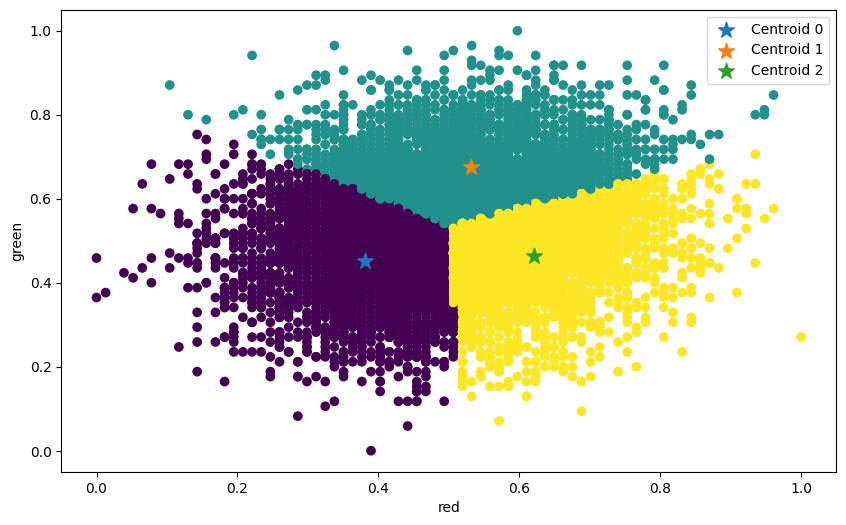

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(x_train[:,0],x_train[:,1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1], cmap='rainbow',marker='*', s=140,label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1], cmap='rainbow',marker='*', s=140,label='Centroid 1')
plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,1], cmap='rainbow',marker='*', s=140,label='Centroid 2')
plt.xlabel("red")
plt.ylabel("green")
plt.legend()

mencari K tebaik

In [46]:
inertias = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)

In [47]:
inertias

[373.2862770111977,
 233.59455248095492,
 170.3857639925304,
 131.94789417326592,
 111.37909635384437,
 91.94340263825194,
 80.56556653289609,
 72.29722628440393,
 64.96268511263311]

elbu metod(lekukan tajam/siku bahwa k trbaik adalah 2)

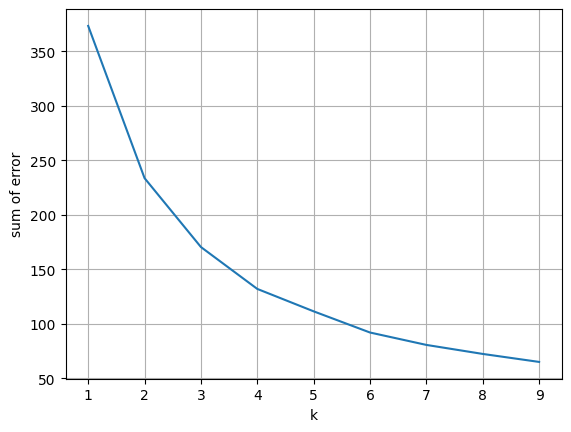

In [48]:
plt.xlabel("k")
plt.ylabel("sum of error")
plt.plot(k_range,inertias)
plt.grid()

membuat dataset baru dengan label cluster

In [51]:
alibi["Cluster"] = alibi["Cluster"].replace([0,1,2],['buah', 'buih','buhi'])

In [52]:
alibi

,diameter,weight,red,green,blue,name,Cluster
0,2.96,86.76,172,85,2,orange,buhi
1,3.91,88.05,166,78,3,orange,buhi
2,4.42,95.17,156,81,2,orange,buih
3,4.47,95.60,163,81,4,orange,buhi
4,4.48,95.76,161,72,9,orange,buhi
...,...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit,buah
9996,15.41,254.67,148,68,7,grapefruit,buah
9997,15.59,256.50,168,82,20,grapefruit,buhi
9998,15.92,260.14,142,72,11,grapefruit,buah
